In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data['date'] = pd.to_datetime(data['date'])

data = data.sort_values(by=['user', 'date'])

#mods: 1206paul_, aloddin, balintboss, banties1g, devilleboi, fossabot, gkey, hueqi, ivana_10, ivanonmyown, klimzaa, martin_gales, moki1g, nightbot, ravenbtw, streamelements, substen.

#data2 = data[data['user'] == '1206paul_']
#data2 = data[data['user'] == 'Aloddin']
#data2 = data[data['user'] == 'klimzaa']
#data2 = data[data['user'] == 'balintboss']
#data2 = data[data['user'] == 'Banties1g']
#data2 = data[data['user'] == 'devilleboi']
#data2 = data[data['user'] == 'fossabot']
data2 = data[data['user'] == 'gkey']
#data2 = data[data['user'] == 'Hueqi']
#data2 = data[data['user'] == 'IvanOnMyOwn']
#data2 = data[data['user'] == 'Ivana_10']
#data2 = data[data['user'] == 'Martin_Gales']

#data2 = data[data['user'] == 'moki1g']
#data2 = data[data['user'] == 'nightbot']
#data2 = data[data['user'] == 'Ravenbtw']
#data2 = data[data['user'] == 'StreamElements']
#data2 = data[data['user'] == 'Substen']

#vips: 1SKELTON, fartnado2020, kloakpojken, kuddo_, nate_001_, ojov, pfftsmh, spinglebob, thebigdogjay, Typhu25, wasabi__ttv.

#data2 = data[data['user'] == 'Typhu25']
#data2 = data[data['user'] == 'fartnado2020']
#data2 = data[data['user'] == 'wasabi__ttv']
#data2 = data[data['user'] == '1SKELTON']
#data2 = data[data['user'] == 'pfftsmh']
#data2 = data[data['user'] == 'spinglebob']


#data2 = data[data['user'] == 'Trizze']
#data2 = data[data['user'] == 'MatthewTheTaxCollector']




# Calculate the total number of messages per stream
total_messages_per_stream = data2['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'total_messages': total_messages_per_stream
})

# Calculate the time difference between the first and last messages for each stream
watch_lengths = data2.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['watch_length'] = watch_lengths

# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

stream_stats = stream_stats.reset_index()
stream_stats = stream_stats.sort_values(by='stream')

stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length
13,70,17,886.0,18002.0
57,71,2,8401.0,26839.0
14,72,16,17368.0,21345.0
0,73,65,14303.0,19854.0
8,74,22,1399.0,18507.0
20,76,13,1572.0,20950.0
44,78,6,863.0,20128.0
62,80,1,0.0,22263.0
41,81,6,13481.0,22666.0
59,82,2,22.0,23537.0


In [2]:
data2['user'].max()

'gkey'

In [3]:
# Create a DataFrame with all possible stream values (0 to 80)
all_streams = pd.DataFrame({'stream': range(data['stream'].max()+1)})

# Merge the original DataFrame with the all_streams DataFrame
stream_stats = all_streams.merge(stream_stats, on='stream', how='left')

# Fill missing values with 0
stream_stats.fillna(0, inplace=True)


stream_stats.tail(5)


,stream,total_messages,watch_length,stream_length
78,78,6.0,863.0,20128.0
79,79,0.0,0.0,0.0
80,80,1.0,0.0,22263.0
81,81,6.0,13481.0,22666.0
82,82,2.0,22.0,23537.0


In [4]:
stream_stats.describe()

,stream,total_messages,watch_length,stream_length
count,83.000000,83.000000,83.000000,83.000000
mean,41.000000,9.048193,3843.698795,14726.686747
std,24.103942,10.765690,5294.629582,9245.216943
min,0.000000,0.000000,0.000000,0.000000
25%,20.500000,1.000000,0.000000,8492.500000
50%,41.000000,6.000000,863.000000,17773.000000
75%,61.500000,13.000000,6697.000000,20930.000000
max,82.000000,65.000000,17368.000000,36105.000000


In [5]:
stream_stats['watch_length_in_hour'] = stream_stats['watch_length'] / 60 /60
stream_stats['stream_length_in_hour'] = stream_stats['stream_length'] / 60 /60

stream_stats.head(5)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour
0,0,0.0,0.0,0.0,0.000000,0.000000
1,1,6.0,9282.0,17831.0,2.578333,4.953056
2,2,9.0,13712.0,19147.0,3.808889,5.318611
3,3,12.0,417.0,17451.0,0.115833,4.847500
4,4,21.0,8792.0,18734.0,2.442222,5.203889


In [6]:
stream_stats['persenteg'] = stream_stats['watch_length'] / stream_stats['stream_length'] * 100
stream_stats['persenteg'] = stream_stats['persenteg'].fillna(0)

stream_stats.head(20)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,1,6.0,9282.0,17831.0,2.578333,4.953056,52.055409
2,2,9.0,13712.0,19147.0,3.808889,5.318611,71.614352
3,3,12.0,417.0,17451.0,0.115833,4.847500,2.389548
4,4,21.0,8792.0,18734.0,2.442222,5.203889,46.930714
5,5,7.0,3219.0,20382.0,0.894167,5.661667,15.793347
6,6,16.0,6505.0,16563.0,1.806944,4.600833,39.274286
7,7,6.0,15885.0,17773.0,4.412500,4.936944,89.377145
8,8,13.0,6889.0,18686.0,1.913611,5.190556,36.867173
9,9,27.0,11474.0,16418.0,3.187222,4.560556,69.886710


In [7]:
stream_stats['persenteg'].describe()

count    83.000000
mean     19.819911
std      27.507602
min       0.000000
25%       0.000000
50%       4.158677
75%      34.151510
max      95.812249
Name: persenteg, dtype: float64

In [8]:
stream_stats = stream_stats.sort_values(by='persenteg')

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,0,0.0,0.0,0.0,0.0,0.000000,0.0
30,30,0.0,0.0,0.0,0.0,0.000000,0.0
20,20,0.0,0.0,0.0,0.0,0.000000,0.0
19,19,0.0,0.0,0.0,0.0,0.000000,0.0
31,31,0.0,0.0,0.0,0.0,0.000000,0.0
35,35,1.0,0.0,16999.0,0.0,4.721944,0.0
36,36,0.0,0.0,0.0,0.0,0.000000,0.0
42,42,0.0,0.0,0.0,0.0,0.000000,0.0
51,51,0.0,0.0,0.0,0.0,0.000000,0.0
53,53,0.0,0.0,0.0,0.0,0.000000,0.0


In [9]:
stream_stats['watch_length_in_hour'].sum() /24

3.6924421296296295

In [10]:

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,0,0.0,0.0,0.0,0.0,0.000000,0.0
30,30,0.0,0.0,0.0,0.0,0.000000,0.0
20,20,0.0,0.0,0.0,0.0,0.000000,0.0
19,19,0.0,0.0,0.0,0.0,0.000000,0.0
31,31,0.0,0.0,0.0,0.0,0.000000,0.0
35,35,1.0,0.0,16999.0,0.0,4.721944,0.0
36,36,0.0,0.0,0.0,0.0,0.000000,0.0
42,42,0.0,0.0,0.0,0.0,0.000000,0.0
51,51,0.0,0.0,0.0,0.0,0.000000,0.0
53,53,0.0,0.0,0.0,0.0,0.000000,0.0


In [11]:
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
24,24,22.0,17128.0,26365.0,4.757778,7.323611,64.964916
9,9,27.0,11474.0,16418.0,3.187222,4.560556,69.886710
2,2,9.0,13712.0,19147.0,3.808889,5.318611,71.614352
73,73,65.0,14303.0,19854.0,3.973056,5.515000,72.040899
55,55,29.0,17246.0,21630.0,4.790556,6.008333,79.731854
72,72,16.0,17368.0,21345.0,4.824444,5.929167,81.368002
10,10,7.0,7096.0,8327.0,1.971111,2.313056,85.216765
48,48,23.0,15497.0,17769.0,4.304722,4.935833,87.213687
7,7,6.0,15885.0,17773.0,4.412500,4.936944,89.377145
59,59,28.0,16473.0,17193.0,4.575833,4.775833,95.812249


In [12]:
stream_stats = stream_stats.sort_values(by='stream')
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
73,73,65.0,14303.0,19854.0,3.973056,5.515000,72.040899
74,74,22.0,1399.0,18507.0,0.388611,5.140833,7.559302
75,75,0.0,0.0,0.0,0.000000,0.000000,0.000000
76,76,13.0,1572.0,20950.0,0.436667,5.819444,7.503580
77,77,0.0,0.0,0.0,0.000000,0.000000,0.000000
78,78,6.0,863.0,20128.0,0.239722,5.591111,4.287560
79,79,0.0,0.0,0.0,0.000000,0.000000,0.000000
80,80,1.0,0.0,22263.0,0.000000,6.184167,0.000000
81,81,6.0,13481.0,22666.0,3.744722,6.296111,59.476749
82,82,2.0,22.0,23537.0,0.006111,6.538056,0.093470


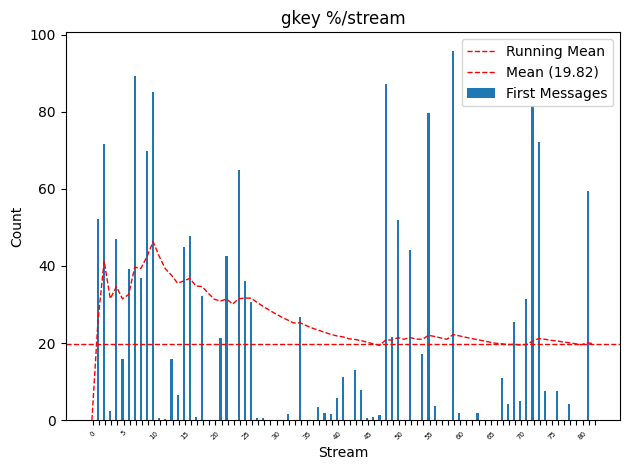

In [13]:
# Plot the chart
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
index = range(len(stream_stats))

# Bar plots
bar1 = ax.bar(index, stream_stats['persenteg'], bar_width, label='First Messages')

# Calculate mean of first messages
persenteg_messages = stream_stats['persenteg'].mean()

stream_stats['persenteg_avg'] = stream_stats['persenteg'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['persenteg_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Draw the mean line
ax.axhline(persenteg_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({persenteg_messages:.2f})')

# Labels and title
ax.set_xlabel('Stream', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title(data2['user'].max() + ' %/stream', fontsize=12)

# Set x-ticks and x-tick labels
ax.set_xticks([i + bar_width / 2 for i in index])
xtick_labels = ['' if i % 5 != 0 else stream_stats['stream'][i] for i in index]
ax.set_xticklabels(xtick_labels, fontsize=5)  # Adjust x-tick labels font size

# Add legend
ax.legend(fontsize=10)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()